In [2]:
#package to read delimited (csv) files
using DelimitedFiles

In [3]:
#read Ebola virus data
ev_data = DelimitedFiles.readdlm("wikipediaEVDraw.csv", ',')


54×9 Matrix{Any}:
 "25 Nov 2015"  28637  11314  3804  2536  …  4808     14122     3955
 "18 Nov 2015"  28634  11314  3804  2536     4808     14122     3955
 "11 Nov 2015"  28635  11314  3805  2536     4808     14122     3955
 "4 Nov 2015"   28607  11314  3810  2536     4808     14089     3955
 "25 Oct 2015"  28539  11298  3806  2535     4808     14061     3955
 "18 Oct 2015"  28476  11298  3803  2535  …  4808     14001     3955
 "11 Oct 2015"  28454  11297  3800  2534     4808     13982     3955
 "27 Sep 2015"  28388  11296  3805  2533     4808     13911     3955
 "20 Sep 2015"  28295  11295  3800  2532     4808     13823     3955
 "13 Sep 2015"  28220  11291  3792  2530     4808     13756     3953
 ⋮                                        ⋱                     
 "14 Jul 2014"    982    613   411   310  …   106       397      197
 "2 Jul 2014"     779    481   412   305       75       252      101
 "17 Jun 2014"    528    337   398   264       24        97       49
 "27 May 2014"    30

In [4]:
#convert date string to DateTime format
using Dates
Dates.DateTime(ev_data[1,1], "d u y")

2015-11-25T00:00:00

In [5]:
#converting col 1 to DateTime type as shown above 
col1 = ev_data[:,1]
for i=1:length(col1)
    col1[i] = Dates.DateTime(col1[i], "d u y")
end 

In [6]:
#create a data giving time in days since 22 Mar 2014 (Rata Die days format)
#it gives number of days since 1 Jan 0001
Dates.datetime2rata(col1[1])


735927

In [7]:
#create a function to express number of days since epidemic day zero, which is col1[54], which is 22 March 2014
days_since_mar22(x) = Dates.datetime2rata(x)-Dates.datetime2rata(col1[54])
epidays = Array{Int64}(undef, 54)
for i = 1:length(col1)
    epidays[i] = days_since_mar22(col1[i])
end 

In [8]:
#export converted data 
ev_data[:,1]=epidays
DelimitedFiles.writedlm("wikipediaEVDdatesconverted.csv", ev_data, ",")

In [9]:
using Pkg
Pkg.add("Plots")
using Plots 

┌ Warning: could not download https://pkg.julialang.org/registries
│   exception = Downloads.RequestError("https://pkg.julialang.org/registries", 6, "Could not resolve host: pkg.julialang.org", Downloads.Response(nothing, "https://pkg.julialang.org/registries", 0, "", Pair{String, String}[]))
└ @ Pkg.Registry C:\Users\maruthinh\AppData\Local\Programs\Julia-1.9.2\share\julia\stdlib\v1.9\Pkg\src\Registry\Registry.jl:69
    Updating registry at `C:\Users\maruthinh\.julia\registries\General.toml`
   Resolving package versions...
  No Changes to `C:\Users\maruthinh\.julia\environments\v1.9\Project.toml`
  No Changes to `C:\Users\maruthinh\.julia\environments\v1.9\Manifest.toml`


In [10]:
#use GR backend for plots 
gr()

Plots.GRBackend()

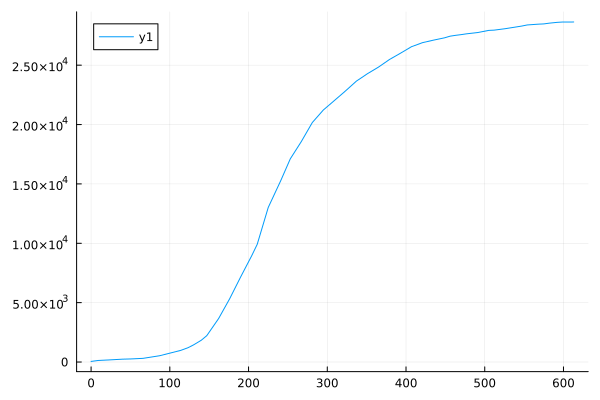

In [11]:
plot(ev_data[:,1], ev_data[:,2])

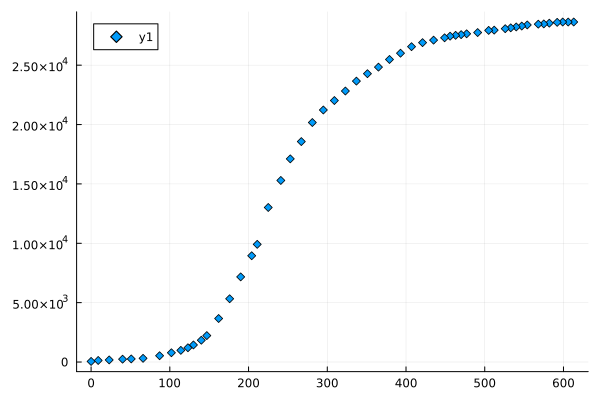

In [12]:
plot(ev_data[:,1], ev_data[:,2], linetype = :scatter, marker = :diamond)

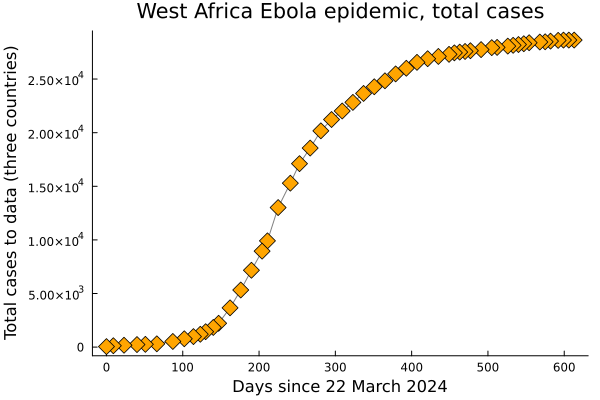

In [13]:
plot(ev_data[:, 1], ev_data[:, 2],
    title="West Africa Ebola epidemic, total cases",
    xlabel="Days since 22 March 2024",
    ylabel="Total cases to data (three countries)",
    marker=(:diamond, 8, "orange"), #paranthesis to group the marker attributes into a composite of attributes
    line=(:path, "gray"),
    legend=false,
    grid=false)

In [14]:
#save plot 
savefig("WAfricaEVD")#by default png 
savefig("WAfricaEVD.pdf")#by default png 

"d:\\MyCodes\\julia\\EbolaWesternAfrica\\WAfricaEVD.pdf"

In [16]:
ev_data

54×9 Matrix{Any}:
 613  28637  11314  3804  2536  10675     4808     14122     3955
 606  28634  11314  3804  2536  10672     4808     14122     3955
 599  28635  11314  3805  2536  10672     4808     14122     3955
 592  28607  11314  3810  2536  10672     4808     14089     3955
 582  28539  11298  3806  2535  10672     4808     14061     3955
 575  28476  11298  3803  2535  10672     4808     14001     3955
 568  28454  11297  3800  2534  10672     4808     13982     3955
 554  28388  11296  3805  2533  10672     4808     13911     3955
 547  28295  11295  3800  2532  10672     4808     13823     3955
 540  28220  11291  3792  2530  10672     4808     13756     3953
   ⋮                                ⋮                        
 114    982    613   411   310    174      106       397      197
 102    779    481   412   305    115       75       252      101
  87    528    337   398   264     33       24        97       49
  66    309    202   281   186     12       11        16      

In [17]:
#fill in missing values 
rows, cols = size(ev_data)
for j = 1:cols
    for i = 1:rows
        if !isnumeric(string(ev_data[i, j])[1])
            ev_data[i, j] = 0
        end
    end
end

In [18]:
#Array slicing 
ev_data[end-9:end, :] #gives last 10 rows
epidays = ev_data[:,1]
evCasesByCountry = ev_data[:,[4,6,8]]

54×3 Matrix{Any}:
 3804  10675  14122
 3804  10672  14122
 3805  10672  14122
 3810  10672  14089
 3806  10672  14061
 3803  10672  14001
 3800  10672  13982
 3805  10672  13911
 3800  10672  13823
 3792  10672  13756
    ⋮         
  411    174    397
  412    115    252
  398     33     97
  281     12     16
  248     12      0
  226     13      0
  168      8      0
  122      8      0
   49      0      0

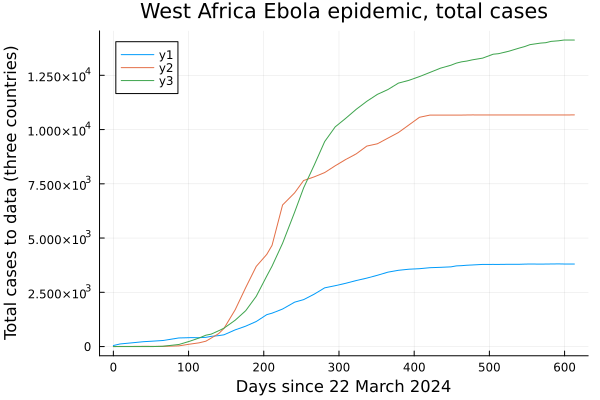

In [19]:
#plot 
plot(epidays, evCasesByCountry[:, 1])
plot!(epidays, evCasesByCountry[:, 2])
plot!(epidays, evCasesByCountry[:, 3])
plot!(title="West Africa Ebola epidemic, total cases",
    xlabel="Days since 22 March 2024",
    ylabel="Total cases to data (three countries)",
    marker=([:octagon :star :square], 8), #paranthesis to group the marker attributes into a composite of attributes
    line=(:scatter),
    label=["Guinea" "Liberia" "Sierra Leone"],
    legend=:topleft)


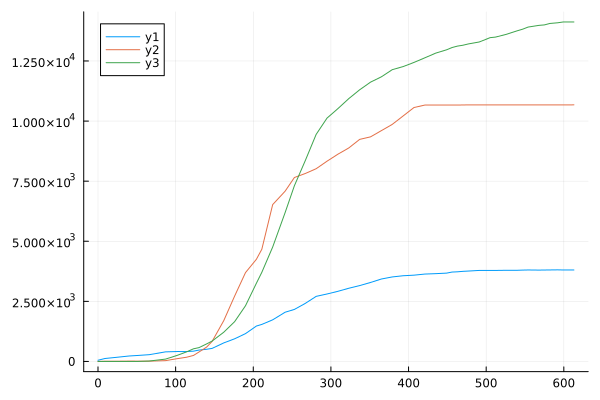

In [20]:
plot(epidays, [evCasesByCountry[:,1] evCasesByCountry[:,2] evCasesByCountry[:,3]])

In [21]:
size(ev_data[end-3:end, :])
size(ev_data)

(54, 9)

In [22]:
typeof(ev_data)

Matrix{Any} (alias for Array{Any, 2})

In [23]:
ev_data[:,1]

54-element Vector{Any}:
 613
 606
 599
 592
 582
 575
 568
 554
 547
 540
   ⋮
 114
 102
  87
  66
  51
  40
  23
   9
   0

In [27]:
c = sqrt.(ev_data[:,1])
c

54-element Vector{Float64}:
 24.758836806279895
 24.61706725018234
 24.474476501040833
 24.331050121192877
 24.124676163629637
 23.979157616563597
 23.83275057562597
 23.53720459187964
 23.388031127053
 23.2379000772445
  ⋮
 10.677078252031311
 10.099504938362077
  9.327379053088816
  8.12403840463596
  7.14142842854285
  6.324555320336759
  4.795831523312719
  3.0
  0.0